In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("Adidas US Sales Datasets.xlsx")

In [3]:
df.drop(index=[0,1,2],axis=1,inplace=True)

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df=df.reset_index(drop=True)

In [6]:
df.columns = df.iloc[0,:]

In [7]:
df.drop(index=0,axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 1 to 9648
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [9]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")

In [10]:
df.head()

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
5,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [11]:
df.invoice_date = pd.to_datetime(df.invoice_date,yearfirst=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 1 to 9648
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer          9648 non-null   object        
 1   retailer_id       9648 non-null   object        
 2   invoice_date      9648 non-null   datetime64[ns]
 3   region            9648 non-null   object        
 4   state             9648 non-null   object        
 5   city              9648 non-null   object        
 6   product           9648 non-null   object        
 7   price_per_unit    9648 non-null   object        
 8   units_sold        9648 non-null   object        
 9   total_sales       9648 non-null   object        
 10  operating_profit  9648 non-null   object        
 11  operating_margin  9648 non-null   object        
 12  sales_method      9648 non-null   object        
dtypes: datetime64[ns](1), object(12)
memory usage: 980.0+ KB


In [13]:
cols_to_convert = ['price_per_unit', 'units_sold', 'total_sales',
       'operating_profit']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric)

In [14]:
df.operating_margin = df.operating_margin.astype(float)

In [15]:
df.head()

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
1,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
2,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
3,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
4,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
5,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [16]:
# Create Month, Year and Profit by Sales Ratio
df.insert(3,"month",df.invoice_date.dt.month_name())

In [17]:
df.insert(4,"year",df.invoice_date.dt.year)

In [18]:
df

,retailer,retailer_id,invoice_date,month,year,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
1,Foot Locker,1185732,2020-01-01,January,2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
2,Foot Locker,1185732,2020-01-02,January,2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
3,Foot Locker,1185732,2020-01-03,January,2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
4,Foot Locker,1185732,2020-01-04,January,2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
5,Foot Locker,1185732,2020-01-05,January,2020,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,Foot Locker,1185732,2021-01-24,January,2021,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9645,Foot Locker,1185732,2021-01-24,January,2021,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9646,Foot Locker,1185732,2021-02-22,February,2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9647,Foot Locker,1185732,2021-02-22,February,2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


### Importing DataFrame to PostgreSQL

In [19]:
from sqlalchemy import create_engine

# Define connection parameters
username = "postgres"
password = "Admin"
host = "localhost"  # or your remote host
port = "5432"       # default PostgreSQL port
database = "adidas_sales"

# Create the SQLAlchemy engine connection string
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

In [20]:
# Assume 'df' is your existing pandas DataFrame
table_name = "adidas"

df.to_sql(
    table_name,
    con=engine,
    if_exists="replace",  # Options: 'fail', 'replace', 'append'
    index=False           # Set to True if you want to import the DataFrame index as a column
)

print(f"Data successfully loaded into table '{table_name}'")

Data successfully loaded into table 'adidas'


### FORECASTING USING PROPHET

In [ ]:
# Data required for forecasting
p_df=df.loc[:,['invoice_date','total_sales']]

In [24]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 1 to 9648
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_date  9648 non-null   datetime64[ns]
 1   total_sales   9648 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 150.9 KB


In [ ]:
# Sum up all the sales to monthly_sales
monthly_sales = p_df.groupby(
    pd.Grouper(key='invoice_date', freq='M')
)['total_sales'].sum().reset_index()

monthly_sales.columns = ['ds', 'y']

C:\Users\CHANDU\AppData\Local\Temp\ipykernel_23884\1774321502.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='invoice_date', freq='M')


In [27]:
monthly_sales

,ds,y
0,2020-01-31,16253746.0
1,2020-02-29,14997988.0
2,2020-03-31,17660577.0
3,2020-04-30,24607006.0
4,2020-05-31,16918014.0
5,2020-06-30,8829819.0
6,2020-07-31,17146013.0
7,2020-08-31,19877980.0
8,2020-09-30,18304436.0
9,2020-10-31,10836269.0


In [29]:
# Install PROPHET
%pip install prophet

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.1 MB 3.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/12.1 MB 2.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/12.1 MB 3.0 MB/s eta 0:00:04
   --------- ------------------------------ 2.9/12.1 MB 3.3 MB/s eta 0:00:03
   ------------ --------------------------- 3.9/12.1 MB 3.6 MB/s eta 0:00:03
   ----------------- ---------------------- 5.2/12.1 MB 4.1 MB/s eta 0:00:02
   ---------------------- ----------------- 6.8/12.1 MB 4.7 MB/s eta 0:00:02
   --------------------------- ------------ 8.4/12.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------- ----- 10.5/12.1 MB 5.5 MB/s eta 0:00:01
   -------------------------------------- - 11.8/12.1 MB 5.7 MB/s eta 0:00:01
   -------

In [42]:
from prophet import Prophet
model = Prophet(yearly_seasonality=True,weekly_seasonality=False,daily_seasonality=False)
model.fit(monthly_sales)

15:34:56 - cmdstanpy - INFO - Chain [1] start processing
15:35:08 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

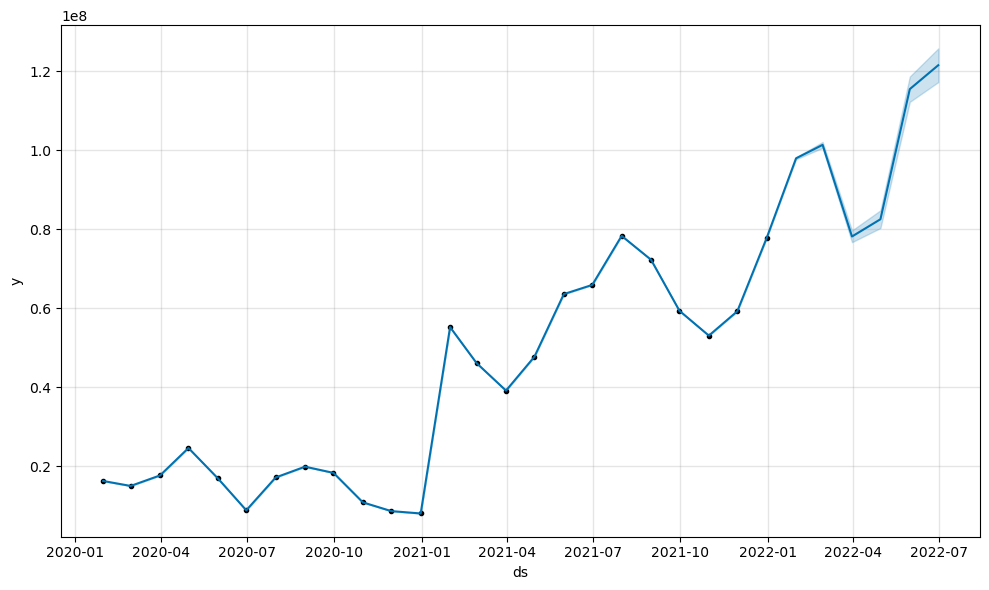

In [44]:
fig = model.plot(forecast)

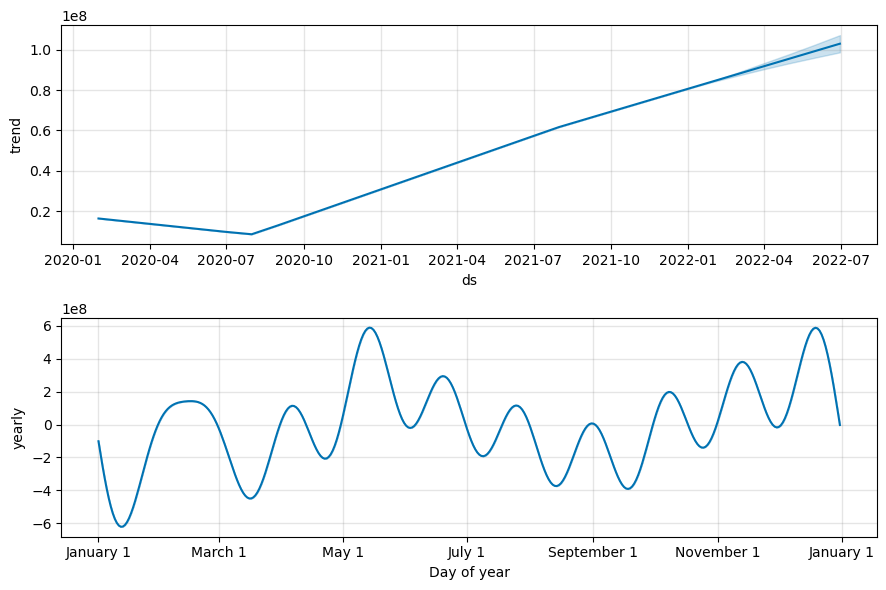

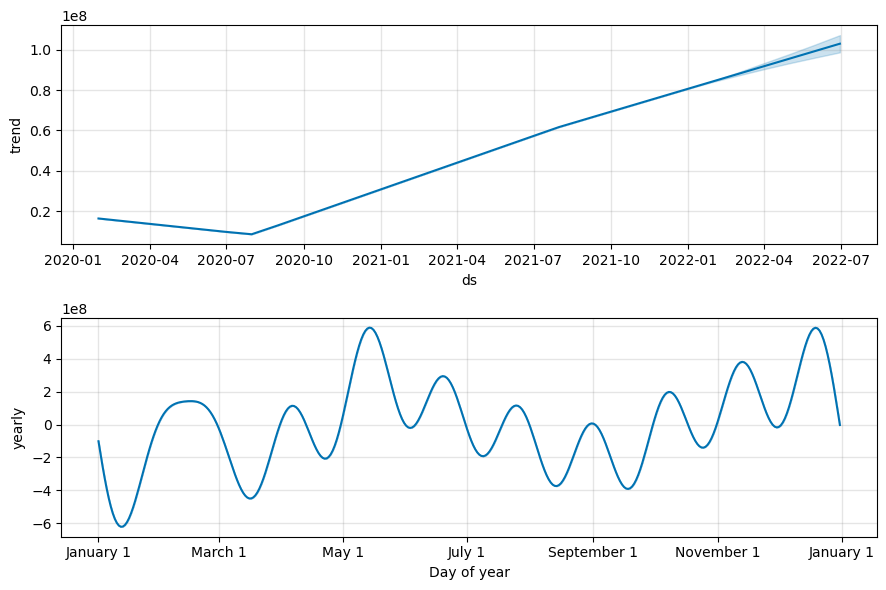

In [45]:
model.plot_components(forecast)